# Dynamic Bayesian Networks

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

In [1]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb
import pyagrum.lib.dynamicBN as gdyn

### Building a 2TBN

Note the naming convention for a 2TBN : a variable with a name $A$ is present at t=0 with the name $A0$ and at time t as $At$.

In [2]:
# hard coded BN
# twodbn=gum.BayesNet()
# a0,b0,c0,at,bt,ct=[twodbn.add(gum.LabelizedVariable(s,s,6))
#                   for s in ["a0","b0","c0","at","bt","ct"]]
# d0,dt=[twodbn.add(gum.LabelizedVariable(s,s,3))
#       for s in ["d0","dt"]]

# twodbn.addArc(a0,b0)

# twodbn.addArc(c0,d0)
# twodbn.addArc(c0,at)

# twodbn.addArc(a0,at)
# twodbn.addArc(a0,bt)
# twodbn.addArc(a0,dt)
# twodbn.addArc(b0,bt)
# twodbn.addArc(c0,ct)
# twodbn.addArc(d0,ct)
# twodbn.addArc(d0,dt)

# twodbn.addArc(at,ct)
# twodbn.generateCPTs()

# fast BN version

twodbn = gum.fastBN("d0[3]->ct<-at<-a0->b0->bt<-a0->dt[3]<-d0<-c0->ct;c0->at", 6)
twodbn

(pyagrum.BayesNet@0x561afbe74c30) BN{nodes: 8, arcs: 11, domainSize: 419904, dim: 988, mem: 9Ko 384o}

## 2TBN

The dbn above actually is a 2TBN and is not correctly shown as a BN. Using the naming convention, it can be shown as a 2TBN.

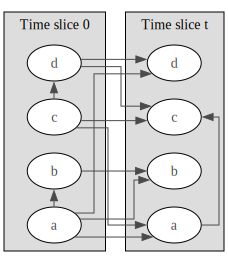

In [3]:
gdyn.showTimeSlices(twodbn)

## unrolling 2TBN

A dBN is 'unrolled' using the 2TBN and the time period size. For a couple $a_0$,$a_t$ in the 2TBN, the unrolled dBN will include $a_0, a_1, \cdots, a_{T-1}$

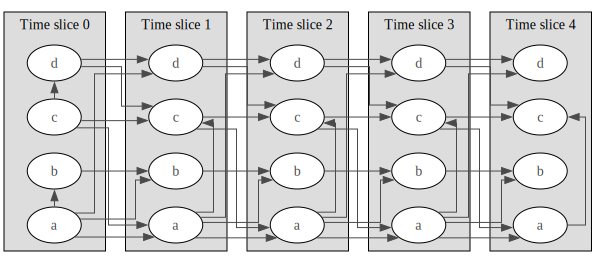

In [4]:
T = 5

dbn = gdyn.unroll2TBN(twodbn, T)
gdyn.showTimeSlices(dbn, size="10")

We can infer on bn just as on a normal bn. Following the naming convention in 2TBN, the variables in a dbN are named using the convention $a_i$ where $i$ is the number of their time slice.


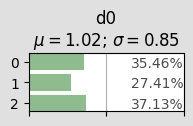
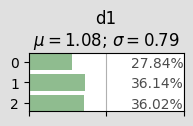
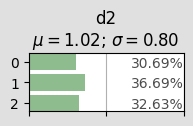
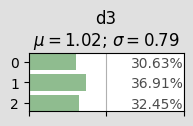
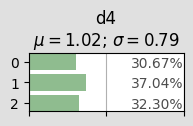

In [5]:
gnb.flow.clear()
for i in range(T):
  gnb.flow.add_html(gnb.getPosterior(dbn, target="d{}".format(i), evs={}), "$P(d{})$".format(i))
gnb.flow.display()

## dynamic inference : following variables

`gdyn.plotFollow` directly ask for the 2TBN, unroll it and add evidence `evs`. Then it shows the dynamic of variable $a$ for instance by plotting $a_0,a_1,\cdots,a_{T-1}$.

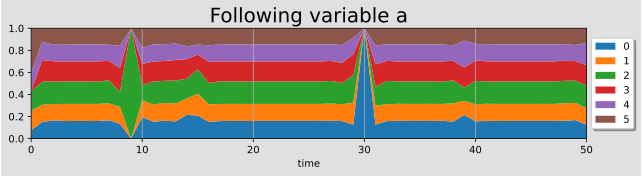

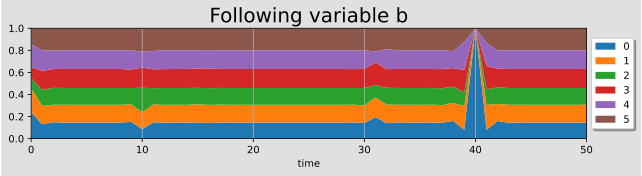

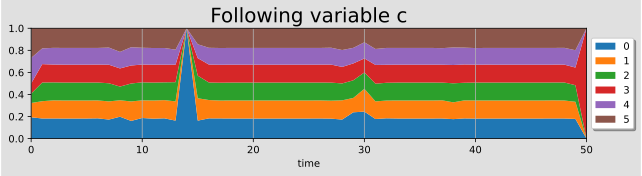

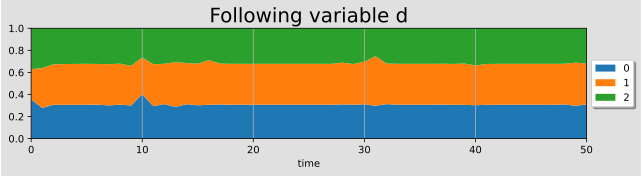

In [6]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 2)
gdyn.plotFollow(["a", "b", "c", "d"], twodbn, T=51, evs={"a9": 2, "a30": 0, "c14": 0, "b40": 0, "c50": 3})

## nsDBN (Non-Stationnary Dynamic Bayesian network)

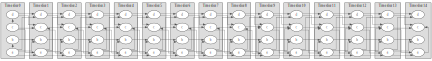

In [7]:
T = 15

dbn = gdyn.unroll2TBN(twodbn, T)
gdyn.showTimeSlices(dbn)

Non-stationnaty DBN allows to express that the dBN do not follow the same 2TBN during all steps. A `unrolled dbn` is  a classical BayesNet and then can be changed as you want after unrolling.

In [8]:
##### new P(ct|c0)
pot = gum.Tensor().add(twodbn["ct"]).add(twodbn["c0"])
pot.fillWith([1, 0, 0, 0.1] * 9).normalizeAsCPT()  # 36 valeurs normalized as CPT

(pyagrum.Tensor@0x561afc323b00) 
      ||  ct                                                       |
c0    ||0        |1        |2        |3        |4        |5        |
------||---------|---------|---------|---------|---------|---------|
0     || 0.4762  | 0.0000  | 0.0000  | 0.0476  | 0.4762  | 0.0000  |
1     || 0.0000  | 0.0833  | 0.8333  | 0.0000  | 0.0000  | 0.0833  |
2     || 0.4762  | 0.0000  | 0.0000  | 0.0476  | 0.4762  | 0.0000  |
3     || 0.0000  | 0.0833  | 0.8333  | 0.0000  | 0.0000  | 0.0833  |
4     || 0.4762  | 0.0000  | 0.0000  | 0.0476  | 0.4762  | 0.0000  |
5     || 0.0000  | 0.0833  | 0.8333  | 0.0000  | 0.0000  | 0.0833  |

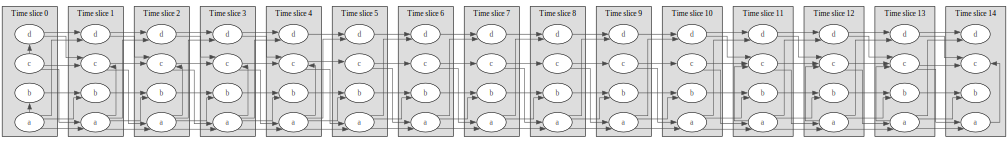

In [9]:
# from steps 5 to 10, $C_t$ only depends on $C_{t-1}$ and follows this new CPT
for i in range(5, 11):
  dbn.eraseArc(f"d{i - 1}", f"c{i}")
  dbn.eraseArc(f"a{i}", f"c{i}")
  dbn.cpt(f"c{i}").fillWith(pot, ["ct", "c0"])  # ct in pot <- first var of cpt, c0 in pot<-second var in cpt

gdyn.showTimeSlices(dbn, size="14")

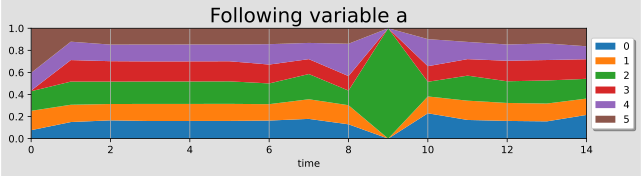

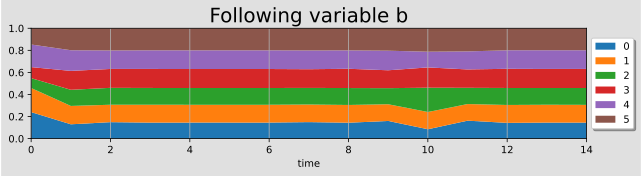

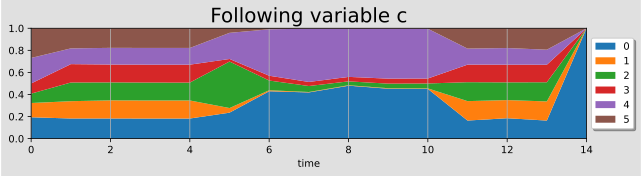

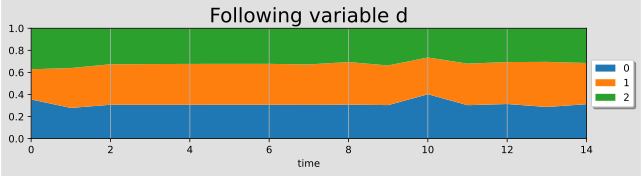

In [10]:
plt.rcParams["figure.figsize"] = (10, 2)
gdyn.plotFollowUnrolled(["a", "b", "c", "d"], dbn, T=15, evs={"a9": 2, "c14": 0})